##### Aula 01 - Operações Básicas

In [ ]:
def brinquedos_autorizados(altura, anoNascimento):
  anoAtual = 2022
  idade = anoAtual - anoNascimento
  brinquedos = []

  if altura >= 1 and idade >= 3:
    brinquedos.append('Carrossel')
  if altura <= 1.3 and idade >= 4 and idade <= 9:
    brinquedos.append('Piscina de Bolinhas')
  if altura >= 1.1:
    brinquedos.append('Montanha Russa')

  if len(brinquedos) == 0:
    print('Nenhum brinquedo autorizado.')
  else:
    print('Brinquedos autorizados:')
    for brinquedo in brinquedos:
      print(brinquedo)

In [ ]:
brinquedos_autorizados(1.2, 2015)

Brinquedos autorizados:
Carrosel
Piscina de Bolinhas
Montanha Russa


In [ ]:
def fatorial(n):
  if n == 1 or n == 0:
    return 1
  else:
    return n * fatorial(n-1)

numero = int(input('Informe o número para calcular o fatorial dele: '))
print(f'O fatorial de {numero} é {fatorial(numero)}')

Informe o número para calcular o fatorial dele: 4
O fatorial de 4 é 24


In [ ]:
numeroInformado = int(input('Informe o número para verificar se é primo: '))
    
numeros = []
for i in range(1, numeroInformado + 1):
  numeros.append(i)

divisores = []
for numero in numeros:
  if numeroInformado % numero == 0:
    divisores.append(numero)

if len(divisores) == 2:
  print(f'O número {numeroInformado} é Primo.')        
else: 
  print(f'O número {numeroInformado} não é Primo.')

print(f'Seus divisores são: \n{divisores}')

Informe o número para verificar se é primo: 1
O número 1 não é Primo.
Seus divisores são: 
[1]


In [ ]:
numeros = []
numeros_repetidos = []
for i in range(1,11):
  numeros.append(int(input(f'Informe o {i}º número: ')))

for j in range(1, len(numeros)):
  if numeros[j] == numeros[j-1] and numeros[j] not in numeros_repetidos:
    numeros_repetidos.append(numeros[j])

print(f'Números repetidos em sequência: \n{numeros_repetidos}')

Informe o 1º número: 1
Informe o 2º número: 1
Informe o 3º número: 1
Informe o 4º número: 2
Informe o 5º número: 0
Informe o 6º número: 3
Informe o 7º número: 0
Informe o 8º número: 3
Informe o 9º número: 3
Informe o 10º número: 5
Números repetidos em sequência: 
[1, 3]


In [ ]:
def soma(a:int = 0, b:int = 0):
  '''Função que soma dois números'''
  return a + b

soma()

0

In [ ]:
def soma(*numeros:int):
  '''Função que soma números'''
  return sum(numeros)

soma(1,2,3)

6

In [ ]:
def soma(**numeros:int):
  '''Função que soma números'''
  return numeros

soma(numero1=1, numero2=2, numero3=3)

{'numero1': 1, 'numero2': 2, 'numero3': 3}

##### Empréstimos

In [ ]:
from pandas import DataFrame
from os import system
resumo = []
temp = {}
amort = 0
juros = 0
taxa = 0
pv = 0

system('clear')
def textoBonito(texto):
    print(len(texto) * "=")
    print(texto)
    print(len(texto) * "=")


def periodo(pv, fv, i):
    from math import log
    n = log(fv/pv)/log(1+i)
    return n


def parcela(pv, i, n):
    pmt = (pv * i) / (1 - (1 + i) ** -n)
    return pmt


def salvar(dataframe):
    from os import getcwd
    from datetime import datetime
    while True:
        print("""Qual extensão você quer? 
        1) CSV - Texto separado por vírgulas
        2) XLSX - Arquivo para Excel
        0) Encerrar""")
        res = ' '
        res = input('Escolha uma opção: ').strip()
        if res not in '1230':
            print('Opção inválida...')
        elif res == '1':
            file = f'{datetime.now()}.csv'
            price.to_csv(file)
            print(f'Arquivo salvo em {getcwd()}/{datetime.now()}.csv')
        elif res == '2':
            file = f'{datetime.now()}.xlsx'
            price.to_excel(file)
            print(f'Arquivo salvo em {getcwd()}/{datetime.now()}.xlsx')
        elif res == '0':
            print('Finalizando...')
            break


while True:
    try:
        pv = float(input('Qual o valor emprestado? '))
    except ValueError:
        print('Você deve inserir um valor válido')
    if pv > 0:
        break

try:
    n = int(input('Por quanto tempo? '))
except ValueError:
        print('Como não foi informado o tempo do empréstimo então será necessário que seja informado o valor final, '
              'já acrescido de juros para podermos continuar.')
        while True:
            try:
                taxa = float(input('A qual taxa de juros? '))
                if taxa > 1:
                    taxa /= 100
                    break
                elif taxa <= 0:
                    print('Insira um valor válido')
                else:
                    break
            except ValueError:
                print('Insira um valor válido')
        while True:
            try:
                fv = float(input('Qual o valor final? '))
                if fv > 0:
                    break
            except ValueError:
                print('Insira um valor válido')
        n = int(periodo(pv, fv, taxa))
        print(f'Será usado o valor de {n} períodos para o cálculo')

while True:
    try:
        taxa = float(input('Qual a taxa de juros? ').replace('%', ''))
        if taxa > 1:
            taxa /= 100
            break
        elif taxa <= 0:
            print('Insira um valor válido')
        else:
            break
    except (ZeroDivisionError, ValueError, NameError):
        print('Insira um valor válido')

pmt = parcela(pv, taxa, n)


for i in range(0, n):
    if i == 0:
        temp['Juros'] = 0
        temp['Amortização'] = 0
        temp['Saldo Devedor'] = pv
        temp['Parcela'] = 0
        temp['Período'] = 0
        resumo.append(temp.copy())
    juros = pv * taxa
    amort = pmt - juros
    pv = pv - amort
    #per += 1
    temp['Juros'] = juros
    temp['Amortização'] = amort
    temp['Saldo Devedor'] = pv
    temp['Parcela'] = pmt
    temp['Período'] = i + 1
    resumo.append(temp.copy())

price = DataFrame(resumo).round()[['Período', 'Parcela', 'Juros', 'Amortização', 'Saldo Devedor']]
textoBonito(f'{"Tabela Price":^55}')
print(price)
salvar(price)

Qual o valor emprestado? 20000
Por quanto tempo? 48
Qual a taxa de juros? 0.007
                     Tabela Price                      
    Período  Parcela  Juros  Amortização  Saldo Devedor
0         0      0.0    0.0          0.0        20000.0
1         1    492.0  140.0        352.0        19648.0
2         2    492.0  138.0        354.0        19293.0
3         3    492.0  135.0        357.0        18937.0
4         4    492.0  133.0        359.0        18577.0
5         5    492.0  130.0        362.0        18215.0
6         6    492.0  128.0        365.0        17851.0
7         7    492.0  125.0        367.0        17483.0
8         8    492.0  122.0        370.0        17114.0
9         9    492.0  120.0        372.0        16742.0
10       10    492.0  117.0        375.0        16367.0
11       11    492.0  115.0        377.0        15989.0
12       12    492.0  112.0        380.0        15609.0
13       13    492.0  109.0        383.0        15226.0
14       14    492.0  10

##### Programação Orientada a Objetos

In [ ]:
import random

class Usuario:
  # contrutor
  def __init__(self, nome: str, cpf: str, email: str) -> None:
    ''' Cria usuário, informe nome, cpf e email '''
    self.nome = nome
    self.cpf = cpf
    self.email = email
    self.senha = str(random.randint(100000, 999999))

  def login(self, email: str, senha: str) -> None:
    ''' Realiza login, informe email e senha '''
    if email == self.email and senha == self.senha:
      print('Logado!')
    else:
      print('Informações incorretas...')

  def __get_senha(self):
    return self.senha
  
  def __set_senha(self, senha):
    self.senha = senha

  # senha = property(__get_senha, __set_senha, 'Ler ou alterar senha')

  def to_dict(self):
    dic = {
        'Nome': self.nome,
        'CPF': self.cpf,
        'Email': self.email,
        'Senha': self.senha
    }    
    return dic

In [ ]:
class Funcionario(Usuario):
  super()

In [ ]:
p1 = Usuario('Rafael', 12345678910, 'rafael@gmail.com') 
p1.login('rafael@gmail.com', '331068')

Informações incorretas...


In [ ]:
p1.to_dict()

{'Nome': 'Rafael',
 'CPF': 12345678910,
 'Email': 'rafael@gmail.com',
 'Senha': '687950'}

In [ ]:
p1.login('rafael@gmail.com', '687950')

Logado!


In [ ]:
lista = [4, 5, 6, 7, 8]

tupla = (1, 'dois', 3.0, lista)

tupla[0:2]

tupla.index('dois')

tupla

(1, 'dois', 3.0, [4, 5, 6, 7, 8])

In [ ]:
tupla = 2, 3, 4
tupla

(2, 3, 4)

##### Cadastrar Usuários

In [ ]:
def cadastrar_usuario():
  nome = input('Nome: ')
  idade = int(input('Idade: '))
  sexo = input('Sexo: ')

  return (nome, idade, sexo)

parar = 
cadastros = cadastrar_usuario()
cadastros

Nome: Fulano
Idade: 21
Sexo: m


('Fulano', 21, 'm')

In [ ]:
nome, idade, sexo = cadastros

In [ ]:
lista = list(range(1,10))
lista

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
numeros = [*map(int,input('Informe o número: ').split(' '))]
numeros

Informe o número: 10 20 30 40 50


[10, 20, 30, 40, 50]

In [ ]:
from collections import namedtuple
Pessoa = namedtuple('Pessoa', ['nome', 'idade', 'estado'])

c1 = Pessoa('Gil', '35', 'SP')
c1

Pessoa(nome='Gil', idade='35', estado='SP')

In [ ]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'lista = *range(1,10)',
  'lista = *[range(1,10)]',
  'lista = [range(1,10)]',
  'lista = [range(1,10)]\nlista',
  'lista = range(1,10)\nlista',
  'lista = list(range(1,10))\nlista',
  "numeros = [* map(int,input('Informe o número: ').split(''))]\nnumeros",
  'numeros = [* map(int,input(\'Informe o número: \').split("\'\'"))]\nnumeros',
  "numeros = [* map(int,input('Informe o número: ').split(''))]\nnumeros",
  "numeros = [* map(int,input('Informe o número: ').split(''))]\nnumeros",
  "numeros = [* map(int,input('Informe o número: ').split(' '))]\nnumeros",
  "numeros = [map(int,input('Informe o número: ').split(' '))]\nnumeros",
  "numeros = [*map(int,input('Informe o número: ').split(' '))]\nnumeros",
  'from

##### Compreensão de listas

In [ ]:
lista = [1,2,3,4,5,6,7,8,9,10]

import time
%%timeit
[i**2 for i in lista]

UsageError: Line magic function `%%timeit` not found.


In [ ]:
string = 'banana'
print(''.join([c for c in string if c not in 'aeiou']))

bnn


In [ ]:
dict1 = {'Maça': 3, 'Linguiça': 30, 'Pera': 5, 'Bife': 50}
dict2 = {produto: valor for produto, valor in dict1.items() if valor > 20}
dict2

{'Linguiça': 30, 'Bife': 50}

##### Exercícios - Módulo II

In [ ]:
print([x**2 for x in range(5)])

[0, 1, 4, 9, 16]


In [ ]:
print([x**2 for x in range(10) if x % 2 == 0])

[0, 4, 16, 36, 64]


In [ ]:
nomes = ['Sofia Silva',
 'Agatha Ferreira',
 'Sra. Sophia Lima',
 'Dr. Cauã Costela',
 'Carlos Eduardo Melo',
 'Ana Beatriz Ramos',
 'Camila Silveira',
 'Catarina da Paz',
 'Laura Melo',
 'Valentina Fogaça',
 'Eduardo Nascimento',
 'Daniel Moraes',
 'Maysa Ribeiro',
 'Dr. Enzo da Rocha',
 'Noah Campos',
 'Lavínia Castro',
 'Pietra Rezende',
 'Ana Beatriz Silva',
 'Fernando da Luz',
 'Maria Cecília Alves',
 'Pietro Aragão',
 'Giovanna da Rosa',
 'Srta. Mirella Jesus',
 'Pedro Henrique Ribeiro',
 'Davi Lucca Dias',
 'Augusto Oliveira',
 'Kaique Mendes',
 'Dra. Mirella Gonçalves',
 'Helena Barbosa',
 'Calebe Farias',
 'Gabrielly Cardoso',
 'Sr. Kevin Fernandes',
 'Kamilly Ramos',
 'Cecília da Cruz',
 'Pietra Aragão',
 'Luiz Gustavo Almeida',
 'Letícia Nascimento']

letras = [len(x.replace(' ', '')) for x in nomes]
print(letras)

[10, 14, 14, 14, 17, 15, 14, 13, 9, 15, 17, 12, 12, 14, 10, 13, 13, 15, 13, 17, 12, 14, 17, 20, 13, 15, 12, 20, 13, 12, 16, 17, 12, 13, 12, 18, 17]


In [ ]:
cadastros = {
982432: {'name': 'Clarice Barbosa', 'sex': 'F', 'idade': 101},
 929103: {'name': 'Yuri Aragão', 'sex': 'M', 'idade': 63},
 930428: {'name': 'Kaique Viana', 'sex': 'M', 'idade': 16},
 547921: {'name': 'Emilly da Luz', 'sex': 'F', 'idade': 2},
 766567: {'name': 'Guilherme Lopes', 'sex': 'M', 'idade': 58},
 514041: {'name': 'Igor Peixoto', 'sex': 'M', 'idade': 16},
 613153: {'name': 'Lívia Lima', 'sex': 'F', 'idade': 10},
 326839: {'name': 'Lucas Pinto', 'sex': 'M', 'idade': 2},
 322292: {'name': 'Maria Farias', 'sex': 'F', 'idade': 58},
 119132: {'name': 'Sr. Daniel Pinto', 'sex': 'M', 'idade': 51},
 436737: {'name': 'Dr. Ian da Conceição', 'sex': 'M', 'idade': 106},
 239127: {'name': 'Bruna Ferreira', 'sex': 'F', 'idade': 81},
 326000: {'name': 'Alícia da Luz', 'sex': 'F', 'idade': 81},
 454248: {'name': 'Sr. Leandro Sales', 'sex': 'M', 'idade': 71},
 656414: {'name': 'Benício Campos', 'sex': 'M', 'idade': 93},
 740236: {'name': 'Bianca da Rosa', 'sex': 'F', 'idade': 59},
 78234: {'name': 'Gabriela Alves', 'sex': 'F', 'idade': 14},
 811343: {'name': 'Raul Castro', 'sex': 'M', 'idade': 5},
 838719: {'name': 'Srta. Bianca Teixeira', 'sex': 'F', 'idade': 16},
 41316: {'name': 'Dra. Marcela Moreira', 'sex': 'F', 'idade': 39},
 547931: {'name': 'Daniela Alves', 'sex': 'F', 'idade': 49},
 945726: {'name': 'Pedro Lucas Rocha', 'sex': 'M', 'idade': 6},
 132689: {'name': 'Enzo Gabriel Melo', 'sex': 'M', 'idade': 110},
 368911: {'name': 'Yasmin Silveira', 'sex': 'F', 'idade': 29},
 13789: {'name': 'Francisco Carvalho', 'sex': 'M', 'idade': 24},
 286652: {'name': 'Vitor Hugo Rezende', 'sex': 'M', 'idade': 16},
 696760: {'name': 'Sophia Moreira', 'sex': 'F', 'idade': 44},
 5293: {'name': 'André da Paz', 'sex': 'M', 'idade': 71},
 452742: {'name': 'Carolina Fogaça', 'sex': 'F', 'idade': 8},
 987830: {'name': 'Joaquim Barbosa', 'sex': 'M', 'idade': 18},
 219271: {'name': 'Calebe da Mota', 'sex': 'M', 'idade': 95},
 583886: {'name': 'Giovanna Ramos', 'sex': 'F', 'idade': 8},
 322316: {'name': 'Ana Luiza Cunha', 'sex': 'F', 'idade': 3},
 731939: {'name': 'Mirella Costela', 'sex': 'F', 'idade': 76},
 396426: {'name': 'Pedro Lucas Freitas', 'sex': 'M', 'idade': 62},
 621867: {'name': 'Letícia Santos', 'sex': 'F', 'idade': 14},
 147939: {'name': 'Julia Rocha', 'sex': 'F', 'idade': 68},
 660287: {'name': 'Sra. Maria Cecília Cavalcanti', 'sex': 'F', 'idade': 66},
 680444: {'name': 'Sra. Emanuelly da Mota', 'sex': 'F', 'idade': 93},
 790899: {'name': 'Luna Fogaça', 'sex': 'F', 'idade': 100}
 }

lista = [valor['name'] for valor in cadastros.values() if valor['idade'] > 18]
print(lista)

['Clarice Barbosa', 'Yuri Aragão', 'Guilherme Lopes', 'Maria Farias', 'Sr. Daniel Pinto', 'Dr. Ian da Conceição', 'Bruna Ferreira', 'Alícia da Luz', 'Sr. Leandro Sales', 'Benício Campos', 'Bianca da Rosa', 'Dra. Marcela Moreira', 'Daniela Alves', 'Enzo Gabriel Melo', 'Yasmin Silveira', 'Francisco Carvalho', 'Sophia Moreira', 'André da Paz', 'Calebe da Mota', 'Mirella Costela', 'Pedro Lucas Freitas', 'Julia Rocha', 'Sra. Maria Cecília Cavalcanti', 'Sra. Emanuelly da Mota', 'Luna Fogaça']


In [ ]:
# Crie um dicionário cujas chaves são os meses do ano e os valores são a duração (em dias) de cada mês.

ano = {
    'janeiro': 31,
    'fevereiro': 28,
    'março': 31,
    'abril': 30,
    'maio': 31,
    'junho': 30,
    'julho': 31,
    'agosto': 31,
    'setembro': 30,
    'outubro': 31,
    'novembro': 30,
    'dezembro': 31
}

for chave, valor in ano.items():
  print(chave, valor)

janeiro 31
fevereiro 28
março 31
abril 30
maio 31
junho 30
julho 31
agosto 31
setembro 30
outubro 31
novembro 30
dezembro 31


In [ ]:
frutas = {
  'Banana': 3.0,
  'Cebola': 4.0,
  'Maçã': 5.7,
  'Abacaxi': 8.0
}

frutas['Maçã'] = 8.6
print(frutas)

{'Banana': 3.0, 'Cebola': 4.0, 'Maçã': 8.6, 'Abacaxi': 8.0}


In [ ]:
''' Crie uma função que receba os valores do nome, 
idade e e-mail de uma pessoa e guarde-os em um dicionário 
com as chaves ‘nome’, ‘idade’ e ‘email’, respectivamente. 
Sua função deve retornar esse dicionário. '''

def cadastro(nome, idade, email):
  dic = {}
  dic['nome'] = nome
  dic['idade'] = idade
  dic['email'] = email

  return dic

print(cadastro('João', '27', 'joao@email.com'))

{'nome': 'João', 'idade': '27', 'email': 'joao@email.com'}


In [ ]:
tabela = {
    'Maria': {'Coluna A': 1, 'Coluna B': 5},
    'Pedro': {'Coluna A': 0.5, 'Coluna B': 3},
    'João': {'Coluna A': 3.2, 'Coluna B': 1}
}

print(tabela['Pedro'].get('Coluna B'))

3


In [ ]:
lista = [3, 4, 1, 1, 1, 2, 5, 4, 3, 2, 6, 7, 6]
dic = {}

for ele in set(lista):
  dic[ele] = lista.count(ele)

print(dic)

{1: 3, 2: 2, 3: 2, 4: 2, 5: 1, 6: 2, 7: 1}


In [ ]:
dic = {}

while True:
  opcao = '-'  
  while opcao not in '1234':
    opcao = input('Informe 1 para cadastrar, 2 para imprimir, 3 para sair, 4 buscar: ')
  
  if opcao == '1':
    cpf = input('Informe o CPF: ')
    nome = input('Informe o nome: ')
    idade = int(input('Informe a idade: '))
    email = input('Informe o email: ')
    
    dic[cpf] = {'nome': nome, 'idade': idade, 'email': email}
  
  if opcao == '2':
    for chave, valor in dic.items():
      print(chave, valor)
  
  if opcao == '3':
    break
  
  if opcao == '4':
    cpf = input('Informe o CPF para a busca: ')

    if dic.get(cpf) == None:
      print('Usuário não cadastrado')
    else: 
      print(dic.get(cpf))

Informe 1 para cadastrar, 2 para imprimir, 3 para sair, 4 buscar: 1
Informe o CPF: 123456
Informe o nome: Pedro
Informe a idade: 54
Informe o email: pedro@email.com
Informe 1 para cadastrar, 2 para imprimir, 3 para sair, 4 buscar: 1
Informe o CPF: 123132
Informe o nome: Maria
Informe a idade: 52
Informe o email: m@m.com
Informe 1 para cadastrar, 2 para imprimir, 3 para sair, 4 buscar: 1
Informe o CPF: 123
Informe o nome: João
Informe a idade: 21
Informe o email: j@j.om
Informe 1 para cadastrar, 2 para imprimir, 3 para sair, 4 buscar: 2
123456 {'nome': 'Pedro', 'idade': 54, 'email': 'pedro@email.com'}
123132 {'nome': 'Maria', 'idade': 52, 'email': 'm@m.com'}
123 {'nome': 'João', 'idade': 21, 'email': 'j@j.om'}
Informe 1 para cadastrar, 2 para imprimir, 3 para sair, 4 buscar: 4
Informe o CPF para a busca: 123
{'nome': 'João', 'idade': 21, 'email': 'j@j.om'}
Informe 1 para cadastrar, 2 para imprimir, 3 para sair, 4 buscar: 4
Informe o CPF para a busca: 5
Usuário não cadastrado
Informe 1 p

In [ ]:
dic = {}

string = input('Informe uma palavra: ')

for char in sorted(set(string)):
  dic[char] = string.count(char)

print(dic)

Informe uma palavra: language
{'a': 2, 'e': 1, 'g': 2, 'l': 1, 'n': 1, 'u': 1}


In [ ]:
alunos = {
    'Alex': [10, 5, 3],
    'Maria': [5, 7, 6.5],
    'Pedro': [8, 9, 10]
}

def media(dic):
  for chave, valor in dic.items():
    dic[chave] = sum(valor) / len(valor) 
  
  return dic

print(media(alunos))

{'Alex': 6.0, 'Maria': 6.166666666666667, 'Pedro': 9.0}


In [ ]:
def fat(n):
  if n in (0, 1):
    return 1
  else:
    return n * fat(n-1)

dic = {}
k = int(input('Informe um valor k: '))

for i in range(1, k + 1):
  dic[i] = fat(i)

print(dic)

Informe um valor k: 5
{1: 1, 2: 2, 3: 6, 4: 24, 5: 120}


In [ ]:
from collections import namedtuple
from copy import deepcopy

Pessoa = namedtuple('Pessoa', ['cpf', 'nome', 'idade', 'sexo', 'renda', 'estado'])

def cadastrar_usuario():
  continuar_cadastro = True
  cadastros = {}

  while continuar_cadastro:
    cadastrar = input('Deseja inserir um novo cadastro? ')

    if cadastrar.lower() in ['sim', 's', 'yes', 'y']:
      cpf = input('Insira o cpf: ')
      nome = input('Insira o nome: ')
      idade = int(input('Insira a idade: '))
      sexo = input('Insira o sexo: ')
      renda = float(input('Insira o renda: '))
      estado = input('Insira o estado: ')
      cadastro = Pessoa(
        cpf=cpf,
        nome=nome,
        idade=idade,
        sexo=sexo,
        renda=renda,
        estado=estado
      )
      cadastros[cpf] = cadastro

    elif cadastrar.lower() in ['não', 'nao', 'n', 'no']:
      print(f'Cadastro finalizado, inserido {len(cadastros)} novos')
      continuar_cadastro = False
    else:
      print(f'Opção invalida. Foi inserido "{cadastrar}"')
      print('Escolha entre (sim, s) para cadastrar uma nova pessoa ou (não, n) para parar')
  return cadastros

def filtre_por_sexo(pessoa, sexo):
  return pessoa.sexo == sexo

def pegue_idade_por_sexo(cadastros, sexo):
  lista_de_idades = []
  for pessoa in cadastros.values():
    if filtre_por_sexo(pessoa, sexo):
      idade = pessoa.idade
      lista_de_idades.append(idade)
  return lista_de_idades

def calcule_media(lista_de_valores):
  try:
    media = sum(lista_de_valores) / len(lista_de_valores)
  except ZeroDivisionError:
    media = 'Nenhum cadastro'
  except TypeError:
    raise TypeError(f'Calculo de media invalido, valores {lista_de_valores}')
  return media

def calcule_media_idade_por_sexo(cadastros):
  resultado = []
  for sexo in ['m', 'f']:
    lista_de_idades = pegue_idade_por_sexo(cadastros, sexo)
    media = calcule_media(lista_de_idades)
    resultado.append((sexo, media))
  return tuple(resultado)

def conte_quantidade_por_sexo(cadastros):
  is_masc = lambda pessoa: pessoa.sexo == "m"
  is_fem = lambda pessoa: pessoa.sexo == 'f'
  # Filtrando por sexo
  masc = list(filter(is_masc, cadastros.values()))
  fem = list(filter(is_fem, cadastros.values()))
  qtd_masc = len(masc)
  qtd_fem = len(fem)
  return (('m', qtd_masc), ('f', qtd_fem))

def filtre_dados(cadastros, estado) -> dict:
  cadastros_filtrados = {
      cpf: pessoa for cpf, pessoa in cadastros.items() if pessoa.estado == estado
      }
  return cadastros_filtrados

def delete_cadastro(cadastros, cpf):  
  cadastros = deepcopy(cadastros)
  try:
    cadastros.pop(cpf)
  except KeyError:
    print('Usuário não encontrado')
  return cadastros

##### Desafio de Listas

In [ ]:
'''
Desafio

Crie um sistema de cadastro de produtos. Neste sistema podemos:

Adicionar um novo produto
Remover um produto da base
Consultar quais são os produtos cadastrados
Consultas quais os produtos cadastrados e suas quantidades disponíveis
Adicionar informações extras por produto (descrição por exemplo)
Adicionar ao estoque de um produto
Remover do estoque um produto (nota, o total em estoque não pode ser menor que 0)
Para tal crie as seguintes funções:

cadastre_produto
delete_produto
adicione_produto_estoque
remova_produto_estoque
consulte_produtos
consulte_quantidade
consulte_descricao_produto
ative_sistema
Essa função irá gerenciar todas as funções acima (como um sistema central)
Os atributos possíveis são:

Nome do produto
Quantidade do produto
descrição
Informações adicionais
'''
produtos = []

def cadastre_produto(nome, quantidade=0, descricao=''):
  """Essa função cadastra um novo produto com os campos:
    - nome do produto (obrigatório)
    - quantidade (opcional)
    - descrição (opcional)
    - outros campos
  """

def delete_produto(nome):
  """ Essa função deleta um produto da base pelo `nome do produto`
  """

def adicione_produto_estoque(nome, quantidade):
  """ Essa função adiciona ao estoque uma quantidade de um dado produto
      Nota: Não pode ser aceito quantidade negativas
  """
  if quantidade <= 0: 
    print('Quantidade inválida')
    return

def remova_produto_estoque(nome, quantidade):
  """ Essa função remove do estoque uma quantidade de um dado produto
      Nota: Não pode ser aceito quantidade negativas
  """
  if quantidade <= 0: 
    print('Quantidade inválida')
  return

def consulte_produtos():
  """ Essa função mostra os produtos disponíveis no sistema (somente nome)
  """
  [print(nome[0]) for nome in produtos]

def consulte_quantidade():
  """ Essa função mostra os produtos e a quantidade disponíveis no sistema
  """

def consulte_descricao_produto(nome):
  """ Essa função mostra a descrição e as Informações adicionais de um dado produto
  """

def ative_sistema():
  """ Essa função aceita as interações do usuário, coordenando qual ação deve ser tomada
      Cada ação refere-se as funções desenvolvidas acima.
      Nota: o que fazer se for inserida uma ação inválida?
  """
  ativo = True
  while ativo:
    escolha = ''
    while escolha not in ('0','1','2','3','4','5','6','7'):
      escolha = input('''Escolha uma opção: 
      1) Cadastrar 
      2) Deletar 
      3) Adicionar estoque 
      4) Remover estoque 
      5) Consultar produtos 
      6) Consultar estoque 
      7) Consultar descrição
      0) Finalizar ''')

    if escolha == '1':
      cadastre_produto(nome, quantidade=0, descricao='')
    if escolha == '2':
      delete_produto(nome)
    if escolha == '3':
      adicione_produto_estoque(nome, quantidade)
    if escolha == '4':
      remova_produto_estoque(nome, quantidade)
    if escolha == '5':
      consulte_produtos()
    if escolha == '6':
      consulte_quantidade()
    if escolha == '7':
      consulte_descricao_produto(nome)
    if escolha == '0':
      ativo = False

In [ ]:
ative_sistema()

Escolha uma opção: 
      1) Cadastrar 
      2) Deletar 
      3) Adicionar estoque 
      4) Remover estoque 
      5) Consultar produtos 
      6) Consultar estoque 
      7) Consultar descrição
      0) Finalizar a
Escolha uma opção: 
      1) Cadastrar 
      2) Deletar 
      3) Adicionar estoque 
      4) Remover estoque 
      5) Consultar produtos 
      6) Consultar estoque 
      7) Consultar descrição
      0) Finalizar 0


##### IMC com numpy

In [ ]:
import numpy as np

lista_artificial = [[1.78881069287776, 65.6481019432242, 0],
        [1.5667844336950, 76.6427679834926, 0],
        [2.0921930548074, 55.4681853258539, 1],
        [1.7824709172724, 67.28199736248, 1],
        [1.7357669765411, 69.2890076331505, 0],
        [1.6869746476945, 56.8400511361321, 0],
        [1.7971046329794, 65.2089732846482, 1],
        [1.1873490549389, 48.1647639458379, 0],
        [1.5958914364289, 45.4106481398706, 1],
        [1.3962817760658, 67.9301133367375, 0],
        [1.6061481645731, 67.7196040973561, 0],
        [1.7075899674617, 45.6093326162225, 0],
        [1.7355131159863, 64.8454515098479, 0],
        [1.6720551819612, 39.7059515043444, 1],
        [1.7233770692063, 50.0588802056305, 1],
        [1.6845742723083, 56.5450873826135, 1],
        [1.7332589297219, 37.5121875909276, 0],
        [1.7578996592814, 57.3624223948134, 0],
        [1.9133377051681, 69.3072463864561, 1],
        [1.4560483434458, 69.3423371108747, 0]
]

matriz = np.array(lista_artificial)
calc_imc = [matriz[i][1]/(matriz[i][0]**2)  for i in range(len(matriz))]

imc_list = list()
for pessoa in matriz:
    peso = pessoa[1]
    altura = pessoa[0]
    IMC = (peso/altura**2)
    imc_list.append(IMC)

imc_array = np.array(imc_list)
new_table = np.concatenate((matriz, imc_array.reshape(-1,1)), axis=1)

categoria = []
for sexo, imc in zip(new_table[:,2], calc_imc):
  if sexo == 0:
    # MASCULINO
    if imc < 16.00: categoria.append('Baixo peso Grau III')
    elif imc < 17.00: categoria.append('Baixo peso Grau II')
    elif imc < 18.50: categoria.append('Baixo peso Grau I')
    elif imc < 23.00: categoria.append('Peso ideal')
    elif imc < 28.50: categoria.append('Sobrepeso')
    elif imc < 32.00: categoria.append('Obesidade Grau I')
    elif imc < 35.50: categoria.append('Obesidade Grau II')
    else: categoria.append('Obesidade Grau III')

  if sexo == 1:
    # FEMININO
    if imc < 14.00: categoria.append('Baixo peso Grau III')
    elif imc < 16.00: categoria.append('Baixo peso Grau II')
    elif imc < 17.50: categoria.append('Baixo peso Grau I')
    elif imc < 22.00: categoria.append('Peso ideal')
    elif imc < 25.50: categoria.append('Sobrepeso')
    elif imc < 30.00: categoria.append('Obesidade Grau I')
    elif imc < 34.50: categoria.append('Obesidade Grau II')
    else: categoria.append('Obesidade Grau III')
        
categoria = np.array(categoria).reshape((len(categoria)), 1)
matriz_final = np.append(new_table, categoria, axis=1)
matriz_final

array([['1.78881069287776', '65.6481019432242', '0.0',
        '20.516033969644194', 'Peso ideal'],
       ['1.566784433695', '76.6427679834926', '0.0',
        '31.221422393286545', 'Obesidade Grau I'],
       ['2.0921930548074', '55.4681853258539', '1.0',
        '12.671862322378622', 'Baixo peso Grau III'],
       ['1.7824709172724', '67.28199736248', '1.0', '21.17648965106973',
        'Peso ideal'],
       ['1.7357669765411', '69.2890076331505', '0.0',
        '22.99754610962119', 'Peso ideal'],
       ['1.6869746476945', '56.8400511361321', '0.0',
        '19.972726183561296', 'Peso ideal'],
       ['1.7971046329794', '65.2089732846482', '1.0',
        '20.191130450290462', 'Peso ideal'],
       ['1.1873490549389', '48.1647639458379', '0.0',
        '34.16430688742957', 'Obesidade Grau II'],
       ['1.5958914364289', '45.4106481398706', '1.0',
        '17.82998640186705', 'Peso ideal'],
       ['1.3962817760658', '67.9301133367375', '0.0',
        '34.84305285178067', 'Obesidade

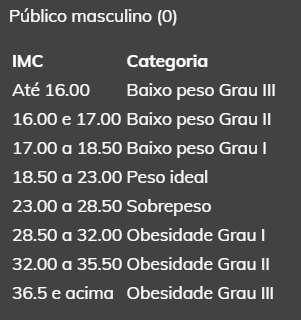

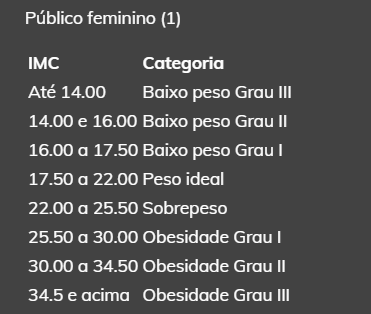

##### Estatísticas

In [ ]:
import statistics as st
import numpy as np

lista = [0,1,1,3,4,5,6,8,8,9,9,9]

np.median(lista)
np.mean(lista)

5.25

In [2]:
import numpy as np
0.9 * np.random.rand(10)

array([0.1525998 , 0.7401683 , 0.55515773, 0.88720105, 0.80527527,
       0.89056347, 0.26730053, 0.19941226, 0.79038663, 0.52809614])